In [1]:
#데이터 구성 패키지 : Series, DataFrame
import datetime 
import pandas as pd
#행렬 연산 패키지
import numpy as np

#데이터 시각화 패키지
import matplotlib.pyplot as plt
import matplotlib

#데이터 시각화(추세 등) 패키지
import seaborn as sns

#통계분석 패키지
from sklearn.preprocessing import scale,minmax_scale,robust_scale

#경고메세지 무시
import warnings
warnings.filterwarnings(action='ignore')


%matplotlib inline

In [2]:
#한글 폰트 적용 
matplotlib.rc('font',family='NanumGothic')
plt.rc('font', family='NanumGothic')

In [3]:
from scipy import stats
import scipy.stats

In [4]:
#seaborn에서 한글 깨짐 해결: unicode minus 사용하지 않겠다.
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df_member=pd.read_csv('./1조_유통/jeju_member.csv')
df_zipcode=pd.read_csv('./1조_유통/jeju_zipcode.csv',encoding='euc-kr')
df_sales=pd.read_csv('./jeju_sales_processed.csv')

In [5]:
df_sales.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000


In [6]:
df_member.head()

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,63,매장,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동
1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
2,C118133,1981-03-20,남,39,30대,일반,4Silver,2011-12-07,2014-04-02,28,매장,N,Y,Y,N,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍
3,C118278,1979-06-22,여,41,40대,일반,3Gold,2011-12-11,NaN,97,인터넷,Y,Y,Y,Y,695-791,제주시,애월읍,광령2리,제주 제주시 애월읍 광령2리 제주관광대학
4,C118280,1959-08-28,남,61,60대,일반,3Gold,2011-12-11,2016-05-02,53,기타,N,N,N,N,699-905,서귀포시,성산읍,삼달리,제주 서귀포시 성산읍 삼달리


In [7]:
#탈퇴한 사람 634명
(df_member['flag_member'] == 'N').sum()

634

In [8]:
time_last = pd.to_datetime('2019-12-31')
time_first = pd.to_datetime('2019-07-01')
time_last-time_first

Timedelta('183 days 00:00:00')

In [36]:
#datetime 타입으로 변환
df_sales['last_purchase'] = pd.to_datetime(df_sales['purchase_date'],infer_datetime_format=True)
time_last = pd.to_datetime('2019-12-31')
df_sales['recency'] = time_last-df_sales['last_purchase']
df1 = df_sales.groupby("customer_id").agg({'recency': 'min'}).reset_index()

In [10]:
df_r = pd.merge(df_member,df1,how='inner',left_on='customer_id',right_on='customer_id')

**df_member에 있는데, df_sales에 없음(약 3200개 정도) => 회원인데 구매는 안했다?**   
최근 방문 일자 확인하기 위해,    
일단 회원중에 가입하고 물건을 구매한 사람들 중에 12월31일 기준으로 몇일 전에 구매했는지 확인(recency)    
**최근 구매일자 기준으로 cut**

In [11]:
df_r.shape

(2755, 21)

In [12]:
df_sales.shape

(273295, 19)

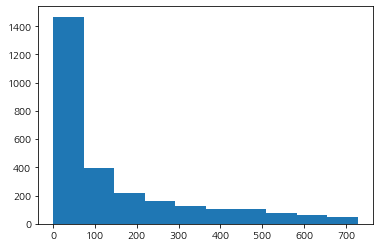

In [13]:
#최근 방문 일자 분포도
day_list = [t.days for t in df_r['recency']]
plt.hist(day_list)
plt.show()

In [14]:
#최근구매일자 Q1,Median,Q3
df_r['recency'].describe()

count                           2755
mean     144 days 20:23:36.479128856
std      179 days 02:58:09.594158868
min                  1 days 00:00:00
25%                 15 days 00:00:00
50%                 62 days 00:00:00
75%                215 days 00:00:00
max                728 days 00:00:00
Name: recency, dtype: object

<AxesSubplot:ylabel='count'>

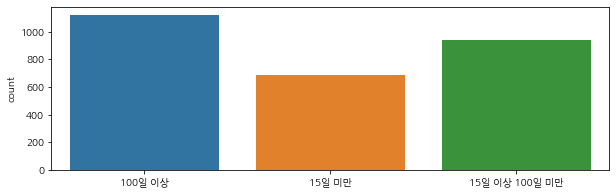

In [15]:
def to_weeks(days):
    if days<15:
        week='15일 미만'
    elif 15<=days<100:
        week='15일 이상 100일 미만'
    else:
        week='100일 이상'
    return week

#최근 방문 일자 분포도
day_list = [t.days for t in df_r['recency']]
day_list = sorted(list(map(to_weeks,day_list)))
plt.figure(figsize = (10, 3))
sns.countplot(day_list)

In [16]:
day_list.count('15일 미만')/len(day_list)*100

24.972776769509984

In [17]:
len(day_list)

2755

**회원가입을 했다가 탈퇴한 사람의 고객 유지 기간 확인**

In [37]:
#회원가입했지만 구매하지 않은 사람들 포함한 데이터
df_include = pd.merge(df_member,df1,how='outer',left_on='customer_id',right_on='customer_id')

In [45]:
df_rp

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,recency
8,C118291,1962-07-19,여,58,50대,일반,1Royal,2011-12-11,NaN,97,...,Y,Y,N,Y,690-760,제주시,노형동,부영아파트,제주 제주시 노형동 부영아파트,1 days
10,C118294,1973-04-19,여,47,40대,일반,2Platinum,2011-12-11,NaN,97,...,Y,Y,Y,Y,697-835,서귀포시,동홍동,119~434,제주 서귀포시 동홍동 119~434,44 days
12,C118298,1952-01-12,여,68,60대,일반,2Platinum,2011-12-11,NaN,97,...,Y,N,Y,Y,699-930,서귀포시,대정읍,NaN,제주 서귀포시 대정읍,14 days
14,C118300,1966-08-25,남,54,50대,일반,1Royal,2011-12-11,NaN,97,...,Y,Y,Y,Y,695-924,제주시,한림읍,금악리,제주 제주시 한림읍 금악리,43 days
17,C118477,1974-11-11,여,46,40대,일반,2Platinum,2011-12-13,NaN,97,...,Y,Y,N,Y,690-170,제주시,연동,NaN,제주 제주시 연동,89 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,C704198,1981-11-20,여,39,30대,일반,2Platinum,2019-12-02,NaN,1,...,Y,Y,Y,Y,690-830,제주시,일도2동,1~53,제주 제주시 일도2동 1~53,5 days
5997,C704271,1972-12-10,여,48,40대,일반,2Platinum,2019-12-01,NaN,1,...,Y,Y,N,N,690-808,제주시,삼도2동,1~56,제주 제주시 삼도2동 1~56,10 days
6001,C704425,1965-08-15,여,55,50대,일반,2Platinum,2019-12-01,NaN,1,...,Y,Y,N,N,697-834,서귀포시,동홍동,1~118,제주 서귀포시 동홍동 1~118,NaT
6007,C705016,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaN,1,...,Y,Y,N,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍,2 days


<AxesSubplot:>

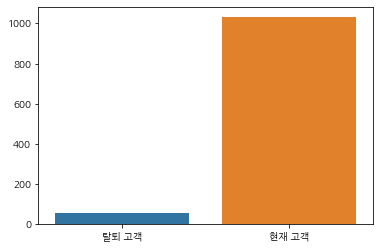

In [54]:
df_rp = df_include.loc[(df_include['customer_grade'] == '1Royal') |(df_include['customer_grade'] == '2Platinum')]
sns.barplot(x=['탈퇴 고객','현재 고객'],y=[(df_rp['taltoi_date'].isnull() == False).sum(),(df_rp['taltoi_date'].isnull() != False).sum()])
plt.title('주요 고객층')

In [53]:
(df_rp['taltoi_date'].isnull() == False).sum()

53

In [50]:
df_rp['taltoi_date'].isnull()

8       True
10      True
12      True
14      True
17      True
        ... 
5994    True
5997    True
6001    True
6007    True
6008    True
Name: taltoi_date, Length: 1085, dtype: bool

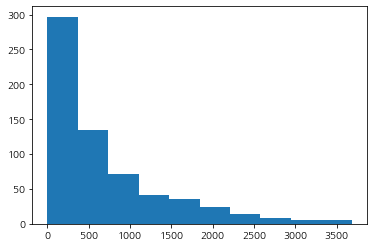

In [19]:
#회원가입했다가 탈퇴한 사람 => 가입했다가 탈퇴하면 구매 데이터 날아감
df_taltoi=df_include.loc[(df_include['recency'].isnull()==True) &(df_include['taltoi_date'].isnull() != True)]
#datetime 타입으로 변환
df_taltoi['gaip_date'] = pd.to_datetime(df_taltoi['gaip_date'],infer_datetime_format=True)
df_taltoi['taltoi_date'] = pd.to_datetime(df_taltoi['taltoi_date'],infer_datetime_format=True)
#가입했다가 탈퇴하기까지 걸리는 시간
df_taltoi['retention_date'] = df_taltoi['taltoi_date'] - df_taltoi['gaip_date']
retention_list = [r.days for r in df_taltoi['retention_date']]

#회원 유지 기간(탈퇴 회원) - 단위: 일
plt.hist(retention_list)
plt.show()

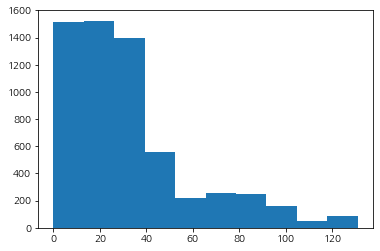

In [20]:
#회원 유지 기간(전체 회원) - 단위: 월 
plt.hist(df_member['member_month'])
plt.show()

In [21]:
retention_list = [r.days for r in df_taltoi['retention_date']]
def to_years(days):
    if days<365:
        year='1년 미만'
    elif 365<=days<365*2:
        year='1년 이상 2년 미만'
    elif 365*2<=days<365*3:
        year='2년 이상 3년 미만'
    elif 365*3<=days<365*4:
        year='3년 이상 4년 미만'
    elif 365*4<=days<365*5:
        year='4년 이상 5년 미만'
    else:
        year='5년 이상'
    return year
retention_list = sorted(list(map(to_years,retention_list)))

<AxesSubplot:ylabel='count'>

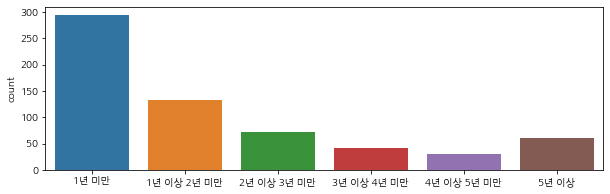

In [22]:
#가입했는데 1년 만에 탈퇴한 경우 매우 많음! 
plt.figure(figsize = (10, 3))
sns.countplot(retention_list)

**회원인데 구매는 안한 사람들의 특징**

In [23]:
#회원가입했다가 탈퇴하지 않았지만 (여전히 회원) 구매는 하지 않은 사람
df_include.loc[(df_include['recency'].isnull()==True) &(df_include['taltoi_date'].isnull() == True)].head()

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,recency
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,63,...,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동,NaT
3,C118278,1979-06-22,여,41,40대,일반,3Gold,2011-12-11,NaN,97,...,Y,Y,Y,Y,695-791,제주시,애월읍,광령2리,제주 제주시 애월읍 광령2리 제주관광대학,NaT
7,C118290,1963-10-17,여,57,50대,일반,3Gold,2011-12-11,NaN,97,...,Y,Y,Y,Y,690-162,제주시,오라2동,NaN,제주 제주시 오라2동,NaT
9,C118292,1953-02-05,여,67,60대,일반,4Silver,2011-12-11,NaN,97,...,Y,Y,N,Y,697-835,서귀포시,동홍동,119~434,제주 서귀포시 동홍동 119~434,NaT
18,C118529,1973-10-12,남,47,40대,일반,4Silver,2011-12-14,NaN,97,...,Y,Y,Y,Y,690-817,제주시,연동,1111~1905,제주 제주시 연동 1111~1905,NaT


<AxesSubplot:xlabel='gaip_path', ylabel='count'>

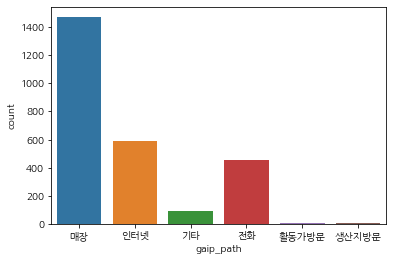

In [24]:
#회원가입했다가 탈퇴하지 않았지만 (여전히 회원) 구매는 하지 않은 사람의 가입경로 
sns.countplot(df_include.loc[(df_include['recency'].isnull()==True) &(df_include['taltoi_date'].isnull() == True),'gaip_path'])

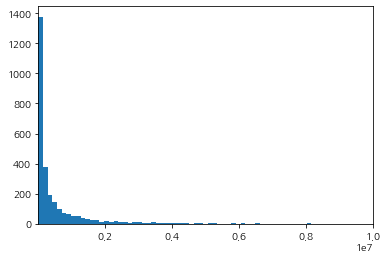

In [25]:
df_sales['purchase_year']=list(map(lambda x:x[:4],df_sales['purchase_date']))
df_2= df_sales.groupby('customer_id').sum()['purchase_amt'].sort_values()
#구매 총액 산포도
plt.hist(df_2.drop('C541748',axis=0),bins=100)
plt.xlim(1,1e7)
plt.show()
#한번 방문하고 다시 방문하지 않은 사람들의 비율이 높은 것을 확인할 수 있음. 

In [26]:
df_2.sort_values().describe()

count    2.755000e+03
mean     5.597786e+05
std      1.593348e+06
min      1.000000e+03
25%      3.732500e+04
50%      1.419500e+05
75%      5.332500e+05
max      6.166230e+07
Name: purchase_amt, dtype: float64

In [27]:
print('Q1:{}'.format(3.732500*1e04))
print('Q2:{}'.format(1.419500*1e05))
print('Q3:{}'.format(5.332500*1e05))
print('IQR:{}'.format(5.332500*1e05-3.732500*1e04))

Q1:37325.0
Q2:141950.0
Q3:533250.0
IQR:495925.0


In [28]:
def how_much(x):
    q1,q2,q3=3.732500*1e04,1.419500*1e05,5.332500*1e05
    if x<q1:
        group = 'low'
    elif q1<=x<q2:
        group = 'middle'
    elif q2<=x<q3:
        group = 'high'
    else:
        group = 'super_high'
        
    return group

df_2=df_2.reset_index()
df_2['spent_group'] = list(map(how_much,df_2['purchase_amt']))

#Q3 이상의 사람들이 전체 매출의 약 80%를 차지한 것을 확인할 수 있음.
count=df_2.groupby('spent_group').agg('sum')
percent=count/np.sum(count)*100
by1=pd.merge(count,percent,left_index=True,right_index=True,suffixes=['count','percent'])
by1.columns=['sum','percent']
by1.sort_values(by='sum')

,sum,percent
spent_group,,
low,11007145,0.713735
middle,52444100,3.400625
high,202700220,13.143660
super_high,1276038615,82.741980


In [133]:
1*1e09

1000000000.0

Text(0, 0.5, '구매 총액(단위:십억원)')

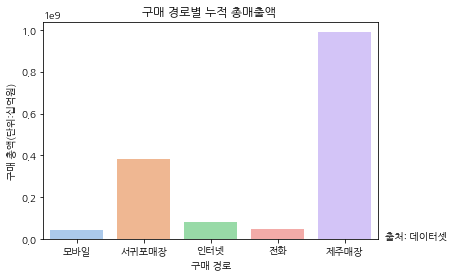

In [107]:
store_amt=df_sales.groupby('store_id').agg('sum')['purchase_amt'].reset_index()
store_amt
sns.barplot(x='store_id',y='purchase_amt',data=store_amt,palette='pastel')
plt.title('구매 경로별 누적 총매출액 ')
plt.text(4.6, 6.025,'출처: 데이터셋')
plt.xlabel('구매 경로')
plt.ylabel('구매 총액(단위:십억원)')

In [108]:
store_amt

,store_id,purchase_amt
0,모바일,42705810
1,서귀포매장,382104479
2,인터넷,80921370
3,전화,48197820
4,제주매장,988260601


In [30]:
df_sales.groupby('store_id').agg('sum')['purchase_amt']

store_id
모바일       42705810
서귀포매장    382104479
인터넷       80921370
전화        48197820
제주매장     988260601
Name: purchase_amt, dtype: int64

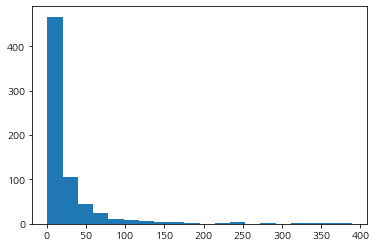

In [64]:
#monetary가 super high인 사람이 얼마나 최근에 방문했는가?
df_merge=pd.merge(df_r,df_2)
df_merge.loc[df_merge['spent_group'] == 'super_high','recency']
#최근 방문 일자 분포도
day_list = [t.days for t in df_merge.loc[df_merge['spent_group'] == 'super_high','recency'] ]
plt.hist(day_list,bins=20)
plt.show()

In [65]:
customer_id=df_merge.loc[df_merge['spent_group'] == 'super_high','customer_id'].reset_index()
customer_id.tail()

,index,customer_id
684,2678,C694221
685,2724,C701791
686,2725,C701806
687,2726,C701813
688,2741,C701957


In [72]:
df_super=pd.merge(customer_id,df_sales,left_on='customer_id',right_on='customer_id',how='inner').drop('index',axis=1)
df_super=df_super[df_super.isnull() == False]    

#super_high 고객의 사람들의 구매수
print(df_super.shape[0]/df_sales.shape[0]*100)
#super_high 고객이 아닌 사람들의 구매수
print((df_sales.shape[0]-df_super.shape[0])/df_sales.shape[0]*100)

81.9908889661355
18.009111033864507


In [69]:
df_super.shape[0]

224077

In [67]:
df_r.shape[0]

2755

In [ ]:
df_super['item_g_s'].value_counts().sort_values(ascending=False).head(20)

In [ ]:
df_super['item_name'].value_counts().sort_values(ascending=False).head(20)

### 13시에 전화 주문한 50대 남자의 정체

In [28]:
df_salesp=pd.read_csv('jeju_sales_processed.csv')
df_salesp.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000


In [ ]:
df_member

In [ ]:
cust_id=df_member.loc[(df_member['gender']=='남') & (df_member['agegroup'] == '50대') ,'customer_id'].reset_index()
df_fiftyman=pd.merge(cust_id,df_salesp,left_on='customer_id',right_on='customer_id',how='inner').drop('index',axis=1)
df_fiftyman=df_fiftyman[df_fiftyman.isnull() == False]
df_fiftyman=df_fiftyman[df_fiftyman['store_id'] == '전화']

In [ ]:
fiftyman_bought=df_fiftyman.groupby('item_g_s').agg('sum').sort_values(by='purchase_cnt',ascending=False).reset_index()
plt.figure(figsize = (30, 3))
sns.barplot(x='item_g_s',y='purchase_cnt',data=fiftyman_bought[0:20])

In [ ]:
fiftyman_bought=df_fiftyman.groupby('item_g_s').agg('sum').sort_values(by='purchase_amt',ascending=False).reset_index()
plt.figure(figsize = (30, 3))
sns.barplot(x='item_g_s',y='purchase_amt',data=fiftyman_bought[0:20])

In [ ]:
df_fiftyman.groupby('customer_id').agg('count')

In [ ]:
fiftyman_bought_max=df_fiftyman.loc[df_fiftyman['customer_id']=='C536929'].groupby('item_g_s').agg('sum').sort_values(by='purchase_cnt',ascending=False).reset_index()
plt.figure(figsize = (30, 3))
sns.barplot(x='item_g_s',y='purchase_cnt',data=fiftyman_bought[0:20])

In [43]:
df_final = pd.read_csv('sales_member_join_processed.csv')
# df_4050 = df_final.loc[(df_final['agegroup'] == '40대') | (df_final['agegroup'] == '50대')]

In [44]:
df_final['purchase_year'] = list(map(lambda x: x[:4], df_final['purchase_yearmonth']))
# df_4050['purchase_year'] = list(map(lambda x: x[:4], df_4050['purchase_yearmonth']))

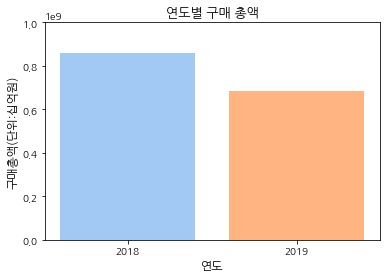

,purchase_year,purchase_amt
0,2018,858704684
1,2019,683485396


In [155]:
df_amt=df_final.groupby('purchase_year').agg('sum')['purchase_amt'].reset_index()
palette = sns.color_palette("pastel")
plt.bar(df_amt['purchase_year'], df_amt['purchase_amt'],color=palette[:len(df_amt)])
plt.title('연도별 구매 총액', fontsize=13)
plt.xlabel('연도', fontsize=12)
plt.ylabel('구매총액(단위:십억원)', fontsize=12)
plt.ylim(0,10*1e08)
plt.show()
df_amt

In [119]:
(858704684-683485396)/858704684

0.20405069550080618

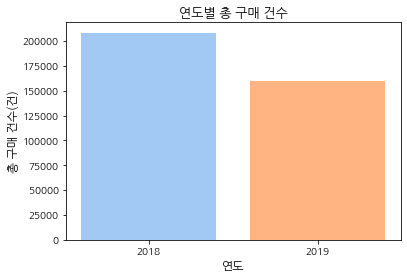

0.23138508502887092

In [151]:
df_cnt=df_final.groupby('purchase_year').agg('sum')['purchase_cnt'].reset_index()
palette = sns.color_palette("pastel")
plt.bar(df_cnt['purchase_year'], df_cnt['purchase_cnt'],color=palette[:len(df_cnt)])
plt.title('연도별 총 구매 건수', fontsize=13)
plt.xlabel('연도', fontsize=12)
plt.ylabel('총 구매 건수(건)', fontsize=12)
plt.show()
df_cnt
(208341-160134)/208341

In [102]:
def top10(year,agegroup):
    df_group = df_final.groupby(['purchase_year','agegroup','item_g_s']).agg('count')[['customer_id']].reset_index()
    df = df_group.loc[(df_group['purchase_year'] == year) & (df_group['agegroup'] == agegroup)]
    df = df.sort_values(by='customer_id',ascending=False)[:30]
    df.columns = ['구매년도','나이대','소분류','해당 아이템을 구매한 고객수']
    return df
    

In [104]:
top10('2019','40대')

,구매년도,나이대,소분류,해당 아이템을 구매한 고객수
1852,2019,40대,스낵,3444
1767,2019,40대,두부,2531
1737,2019,40대,김가공,1546
1764,2019,40대,돼지가공,1471
1826,2019,40대,빵,1297
1900,2019,40대,우유/산양유,1087
1855,2019,40대,식사대용/기타,1002
1771,2019,40대,라면,937
1904,2019,40대,유정란,850
1883,2019,40대,어묵,816


In [171]:
contrast = pd.merge(top10_nodubu('2018','50대'),top10_nodubu('2019','50대'),left_on='item_g_s',right_on='item_g_s',how='outer').drop('agegroup_y',axis=1)

In [172]:
contrast.columns=['year2018','agegroup','item_g_s','count_2018','year2019','count_2019']
contrast=contrast.drop(['year2018','year2019'],axis=1)
contrast['sum'] = contrast['count_2018']+contrast['count_2019']


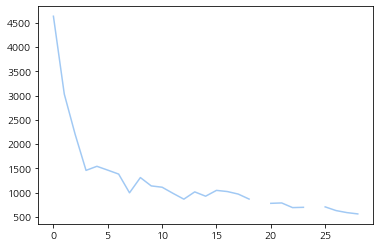

In [174]:
plt.plot(contrast['sum'])

In [163]:
df_nodubu=pd.read_csv('nodu.csv')
df_nodubu['purchase_year'] = list(map(lambda x: x[:4], df_nodubu['purchase_yearmonth']))
# df_4050['purchase_year'] = list(map(lambda x: x[:4], df_4050['purchase_yearmonth']))

In [170]:
def top10_nodubu(year,agegroup):
    df_group = df_nodubu.groupby(['purchase_year','agegroup','item_g_s']).agg('count')[['customer_id']].reset_index()
    df = df_group.loc[(df_group['purchase_year'] == year) & (df_group['agegroup'] == agegroup)]
    df = df.sort_values(by='customer_id',ascending=False)[:30]
    return df
    

In [181]:
df_50=contrast.sort_values(by='sum',ascending=False)

In [185]:
contrast = pd.merge(top10_nodubu('2018','30대'),top10_nodubu('2019','30대'),left_on='item_g_s',right_on='item_g_s',how='outer').drop('agegroup_y',axis=1)

In [186]:
contrast.columns=['year2018','agegroup','item_g_s','count_2018','year2019','count_2019']
contrast=contrast.drop(['year2018','year2019'],axis=1)
contrast['sum'] = contrast['count_2018']+contrast['count_2019']

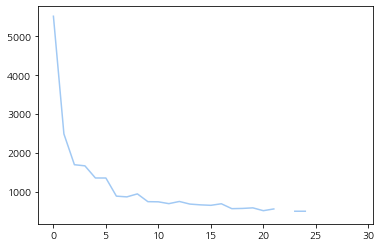

In [187]:
plt.plot(contrast['sum'])

In [189]:
df_50

,agegroup,item_g_s,count_2018,count_2019,sum
0,50대,두부,2618.0,2017.0,4635.0
1,50대,스낵,1564.0,1467.0,3031.0
2,50대,빵,1313.0,888.0,2201.0
4,50대,김가공,917.0,626.0,1543.0
5,50대,돼지가공,908.0,556.0,1464.0
3,50대,유정란,928.0,531.0,1459.0
6,50대,라면,852.0,531.0,1383.0
8,50대,우유/산양유,641.0,670.0,1311.0
9,50대,식사대용/기타,640.0,499.0,1139.0
10,50대,콩나물,594.0,518.0,1112.0


In [188]:
contrast

,agegroup,item_g_s,count_2018,count_2019,sum
0,30대,스낵,2969.0,2547.0,5516.0
1,30대,두부,1373.0,1117.0,2490.0
2,30대,빵,968.0,731.0,1699.0
3,30대,김가공,929.0,741.0,1670.0
4,30대,우유/산양유,776.0,582.0,1358.0
5,30대,돼지가공,735.0,622.0,1357.0
6,30대,라면,540.0,351.0,891.0
7,30대,유정란,511.0,361.0,872.0
8,30대,식사대용/기타,456.0,493.0,949.0
9,30대,콩나물,437.0,312.0,749.0


In [206]:
df_final.loc[df_final['item_g_s']=='두부'].groupby('customer_id').agg('count')

,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,purchase_year
customer_id,,,,,,,,,,,,,,,,,,,,,
C118291,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
C118295,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
C118298,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,0,49,49
C118476,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,0,5,5
C118477,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C699810,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
C700358,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C701813,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


In [8]:
df_p = pd.read_csv('jeju_sales_processed.csv')
df_p.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000


In [80]:
df_sales.shape

(273295, 19)

In [4]:
df_p_j= pd.read_csv('sales_member_join_processed.csv')
df_p_j.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,...,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P08010117,...,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040101,...,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,14:47:04,2018-01-10,P09040100,...,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010305,...,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,11:59:24,2018-10-08,P09010301,...,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동


In [96]:
df_grade=df_p_j[['customer_id','customer_grade','agegroup']]

In [97]:
df_grade=df_grade.drop_duplicates()

In [68]:
df=df_p_j.groupby(['customer_grade']).agg('sum')
df['객단가'] = df['purchase_amt']/[92,751,1541,371]

In [74]:
df['평균구매건수'] = df['purchase_cnt']/[92,751,1541,371]
df = df.reset_index()

,customer_grade,purchase_hour,purchase_cnt,unit_cost,purchase_amt,age,taltoi_date,member_month,객단가,평균구매건수
0,1Royal,970956,104098,304757945,407342212,3453547,0.0,4365892,4.427633e+06,1131.500000
1,2Platinum,1791517,152868,551763737,653534348,5944338,0.0,5054412,8.702188e+05,203.552597
2,3Gold,1230745,106053,374069703,458031805,3988977,0.0,3254346,2.972302e+05,68.820896
3,4Silver,67057,5456,20337235,23281715,211719,0.0,161637,6.275395e+04,14.706199


<AxesSubplot:xlabel='customer_grade', ylabel='객단가'>

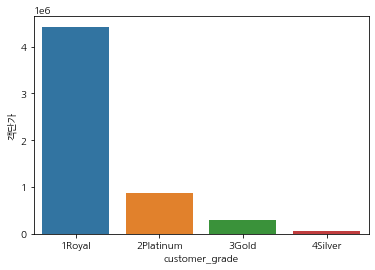

In [75]:
sns.barplot(x='customer_grade',y='객단가',data=df)

<AxesSubplot:xlabel='customer_grade', ylabel='평균구매건수'>

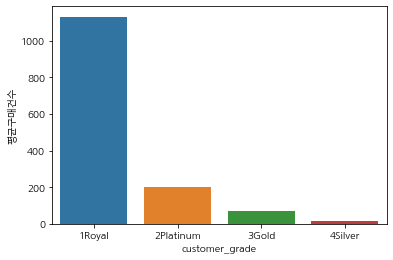

In [76]:
sns.barplot(x='customer_grade',y='평균구매건수',data=df)

In [100]:
#royal 회원별로 purchase_amt 그림, purchase_amt 큰대로 sort
a=df_p_j.loc[df_p_j['customer_grade'] =='1Royal',['customer_id','purchase_amt']].groupby('customer_id').agg('sum').sort_values('purchase_amt').reset_index()

<AxesSubplot:xlabel='customer_id', ylabel='purchase_amt'>

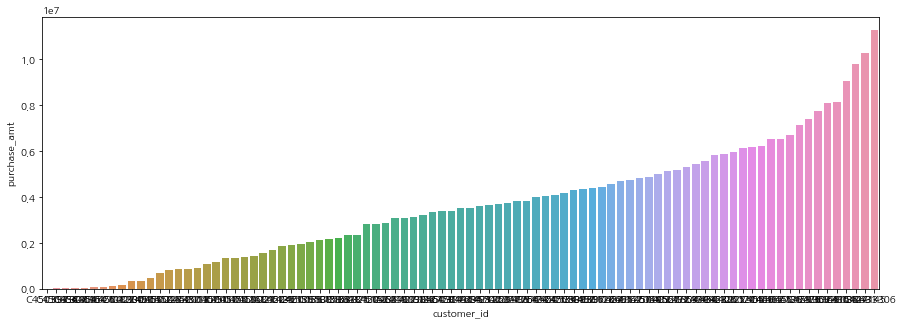

In [101]:
plt.rcParams['figure.figsize'] = [15,5]
sns.barplot(x=a['customer_id'],y=a['purchase_amt'])

In [98]:
b=df_p_j.groupby('customer_id').agg('sum').sort_values('purchase_amt').reset_index()
b.shape

(2755, 8)

In [99]:
b.head()

,customer_id,purchase_hour,purchase_cnt,unit_cost,purchase_amt,age,taltoi_date,member_month
0,C613594,14,1,1000,1000,57,0.0,17
1,C463879,16,1,1300,1300,69,0.0,38
2,C489663,14,1,1300,1300,63,0.0,34
3,C553056,18,1,1300,1300,36,0.0,27
4,C431361,19,1,1300,1300,48,0.0,43


In [118]:
c=pd.merge(b,df_grade,left_on='customer_id',right_on='customer_id')

,customer_id,purchase_hour,purchase_cnt,unit_cost,purchase_amt,age,taltoi_date,member_month,customer_grade,agegroup
0,C613594,14,1,1000,1000,57,0.0,17,3Gold,50대
1,C463879,16,1,1300,1300,69,0.0,38,4Silver,60대
2,C489663,14,1,1300,1300,63,0.0,34,3Gold,60대
3,C553056,18,1,1300,1300,36,0.0,27,3Gold,30대
4,C431361,19,1,1300,1300,48,0.0,43,3Gold,40대


In [106]:
age_4050=c.loc[(c['agegroup']=='40대')|(c['agegroup']=='50대'),'purchase_amt'] 
age_2030=c.loc[(c['agegroup']=='20대')|(c['agegroup']=='30대'),'purchase_amt'] 

In [111]:
#정규성 만족하지 않음. (데이터 양을 늘리거나 층별화, bias 없이 얻어진 데이터인지 확인)
statistic,p=stats.shapiro(age_2030)
print("statistic={},p-value={}".format(statistic,p))
statistic,p=stats.shapiro(age_4050)
print("statistic={},p-value={}".format(statistic,p))

statistic=0.4834389090538025,p-value=1.0776797719559397e-36
statistic=0.2341349720954895,p-value=0.0


In [113]:
#등분산성 확인
stats.levene(age_2030,age_4050) 
#등분산이다.

LeveneResult(statistic=2.8085047931931233, pvalue=0.0938985311094409)

In [115]:
#2-sample t-test
t_result=stats.ttest_ind(age_2030,age_4050,equal_var=True)

#2-sample t-test의 t값, p값 저장
t,p=t_result.statistic.round(3),t_result.pvalue.round(3)

#2-sample t-test의 t값 p값 출력
print("2 sample t-test")
print("t 검정통계량:{}".format(t))
print("p-value:{}".format(p))

2 sample t-test
t 검정통계량:-1.865
p-value:0.062


In [117]:
#비모수 검정
u_result=scipy.stats.mannwhitneyu(age_2030,age_4050, use_continuity=True)
u,p=u_result.statistic.round(3),u_result.pvalue.round(3)
#Mann–Whitney U test의 u값 p값 출력
print("Mann–Whitney U test")
print("u 검정통계량:{}".format(u))
print("p-value:{}".format(p))
### 귀무가설 기각
### 두 집단의 구매 규모 사이에는 유의미한 차이가 있다. 

2 sample u-test
u 검정통계량:433601.5
p-value:0.0


In [119]:
c.head()

,customer_id,purchase_hour,purchase_cnt,unit_cost,purchase_amt,age,taltoi_date,member_month,customer_grade,agegroup
0,C613594,14,1,1000,1000,57,0.0,17,3Gold,50대
1,C463879,16,1,1300,1300,69,0.0,38,4Silver,60대
2,C489663,14,1,1300,1300,63,0.0,34,3Gold,60대
3,C553056,18,1,1300,1300,36,0.0,27,3Gold,30대
4,C431361,19,1,1300,1300,48,0.0,43,3Gold,40대


In [123]:
age_4050=c.loc[(c['agegroup']=='40대')|(c['agegroup']=='50대'),'purchase_amt'] 
age_2030=c.loc[(c['agegroup']=='20대')|(c['agegroup']=='30대'),'purchase_amt'] 

In [124]:
np.sum(age_4050)

0           1000
4           1300
5           1300
8           1350
9           1400
          ...   
2746     8120225
2750    10889410
2752    11582765
2753    14069960
2754    61662297
Name: purchase_amt, Length: 1818, dtype: int64

In [125]:
np.sum(age_2030)

222860517

Text(0, 0.5, '구매 총 금액(십억원)')

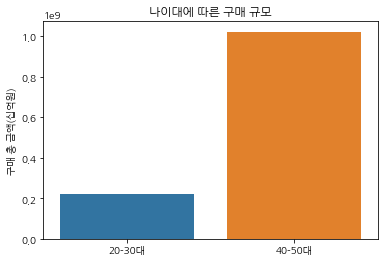

In [128]:
sns.barplot(x=['20-30대','40-50대'],y=[np.sum(age_2030),np.sum(age_4050)])
plt.title('나이대에 따른 구매 규모')
plt.ylabel('구매 총 금액(십억원)')

In [121]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
lm=ols('purchase_cnt~C(customer_grade)',c).fit()
print(anova_lm(lm))

                       df        sum_sq       mean_sq           F  \
C(customer_grade)     3.0  1.069998e+08  3.566659e+07  131.856014   
Residual           2751.0  7.441359e+08  2.704965e+05         NaN   

                         PR(>F)  
C(customer_grade)  8.258996e-80  
Residual                    NaN  


<AxesSubplot:xlabel='customer_id', ylabel='purchase_amt'>

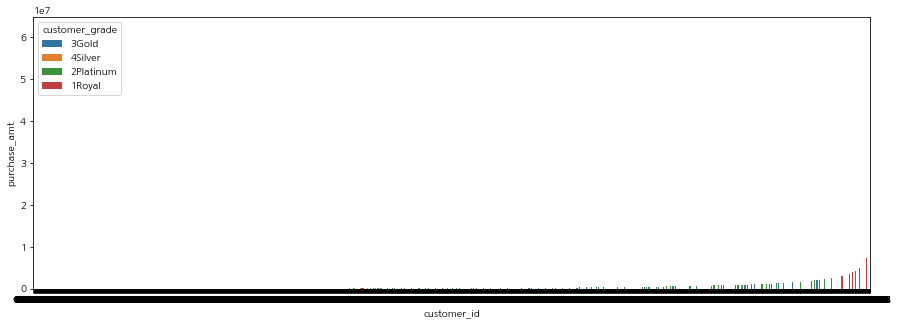

In [146]:
plt.rcParams['figure.figsize'] = [15,5]
sns.barplot(x='customer_id',y='purchase_amt',hue='customer_grade',data=c)

In [162]:
#휴면고객 등급별 회원수 / 활성 고객 등급별 회원수
#[3,38,228,130]/[92,751,1541,371]

In [94]:
df_p_j['purchase_year'] = list(map(lambda x: x[:4], df_p_j['purchase_yearmonth']))
df_p_j['purchase_date'] = pd.to_datetime(df_p_j['purchase_date'])

In [12]:
#객단가
np.sum(df_p_j['purchase_amt'])/len(df_p_j.drop_duplicates(['customer_id']))

559778.613430127

In [13]:
#연령별 회원 수
df_2018=df_p_j.loc[df_p_j['purchase_year']=='2018']
df_2019=df_p_j.loc[df_p_j['purchase_year']=='2019']

In [91]:
(df_2018.drop_duplicates('customer_id')['agegroup']).value_counts()

40대    857
50대    521
30대    352
60대    244
70대     59
80대     16
20대      3
Name: agegroup, dtype: int64

In [92]:
(df_2019.drop_duplicates('customer_id')['agegroup']).value_counts()

40대    966
50대    589
30대    461
60대    268
70대     63
80대     12
20대      2
Name: agegroup, dtype: int64

In [22]:
df_1819=pd.DataFrame({'2018':list(df_2018['agegroup'].value_counts().sort_index()),'2019':list(df_2019['agegroup'].value_counts().sort_index())})
df_1819.index = ['20대','30대','40대','50대','60대','70대','80대']
df_1819['growth'] = (df_1819['2019']-df_1819['2018'])/df_1819['2018']*100
df_1819

,2018,2019,growth
20대,46,108,134.782609
30대,24722,21819,-11.742577
40대,63020,45526,-27.759441
50대,38064,30222,-20.602144
60대,22647,17357,-23.358502
70대,4127,3195,-22.582990
80대,1407,1035,-26.439232


In [27]:
#18년 대비 19년도의 전체 회원 수 감소율
(np.sum(df_1819['2019']) - np.sum(df_1819['2018'])) / np.sum(df_1819['2018'])

-0.22573734199814324

In [21]:
#1인당 1달 간 결제 빈도 평균
np.sum(df_p_j.loc[df_p_j['purchase_date']>'2019-12-01'].drop_duplicates(['customer_id','purchase_date'])['customer_id'].value_counts())/992

2.379032258064516

In [56]:
np.sum(df_p_j['purchase_amt'])

1542190080

In [55]:
df_rp = df_p_j.loc[(df_p_j['customer_grade']== '1Royal') | (df_p_j['customer_grade']== '2Platinum')]
np.sum(df_rp['purchase_amt'])

1060876560

Text(0, 0.5, '구매 금액(십억원)')

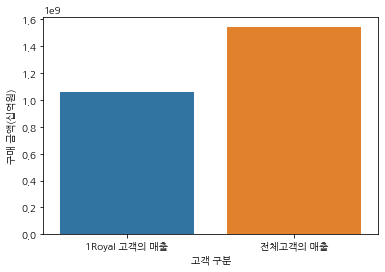

In [62]:

sns.barplot(x=['1Royal 고객의 매출','전체고객의 매출'],y=[np.sum(df_rp['purchase_amt']),np.sum(df_p_j['purchase_amt'])])
plt.xlabel('고객 구분')
plt.ylabel('구매 금액(십억원)')


In [83]:
130/371*100

35.04043126684636

In [106]:
np.sum(df_sales['purchase_amt'])

1542190080

In [11]:
df_act=pd.read_csv('jeju_sleep.csv')
df_act=df_act.drop('Unnamed: 0',axis=1)
df_act.head()

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,63,매장,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동
1,C118278,1979-06-22,여,41,40대,일반,3Gold,2011-12-11,NaN,97,인터넷,Y,Y,Y,Y,695-791,제주시,애월읍,광령2리,제주 제주시 애월읍 광령2리 제주관광대학
2,C118290,1963-10-17,여,57,50대,일반,3Gold,2011-12-11,NaN,97,매장,Y,Y,Y,Y,690-162,제주시,오라2동,NaN,제주 제주시 오라2동
3,C118292,1953-02-05,여,67,60대,일반,4Silver,2011-12-11,NaN,97,기타,Y,Y,N,Y,697-835,서귀포시,동홍동,119~434,제주 서귀포시 동홍동 119~434
4,C118529,1973-10-12,남,47,40대,일반,4Silver,2011-12-14,NaN,97,기타,Y,Y,Y,Y,690-817,제주시,연동,1111~1905,제주 제주시 연동 1111~1905


In [17]:
df_act=pd.read_csv('jeju_ASD.csv')
df_act = df_act.drop('Unnamed: 0',axis=1)

,Unnamed: 0,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,...,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address,ASD
0,0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,...,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동,D
1,1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,...,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동,S
2,2,C118278,1979-06-22,여,41,40대,일반,3Gold,2011-12-11,NaN,...,Y,Y,Y,Y,695-791,제주시,애월읍,광령2리,제주 제주시 애월읍 광령2리 제주관광대학,D
3,3,C118290,1963-10-17,여,57,50대,일반,3Gold,2011-12-11,NaN,...,Y,Y,Y,Y,690-162,제주시,오라2동,NaN,제주 제주시 오라2동,D
4,4,C118291,1962-07-19,여,58,50대,일반,1Royal,2011-12-11,NaN,...,Y,Y,N,Y,690-760,제주시,노형동,부영아파트,제주 제주시 노형동 부영아파트,A


In [28]:
len(df_act[df_act['ASD']=='D'])

2624

In [22]:
df_merge=pd.merge(df_act,df_sales,how='right',left_on='customer_id',right_on='customer_id')
df_merge = df_merge.drop('Unnamed: 0',axis=1)

In [24]:
df_sleep=df_merge[df_merge['ASD']=='S']
df_active=df_merge[df_merge['ASD']=='A']

In [53]:
df_sleep_agegroup=df_sleep['agegroup'].value_counts().reset_index()

In [63]:
df_sleep_agegroup['pct'] = (df_sleep_agegroup['agegroup']/np.sum(df_sleep_agegroup['agegroup'])*100).round(2)

In [67]:
df_deep=df_act[df_act['ASD']=='D'].drop('Unnamed: 0',axis=1)

In [93]:
df_hyumyun=pd.merge(df_deep['agegroup'].value_counts(),df_sleep['agegroup'].value_counts(),left_index=True,right_index=True)
n_hyumyun=(np.sum(df_hyumyun['agegroup_x'])+np.sum(df_hyumyun['agegroup_y']))
df_hyumyun['pct']=((df_hyumyun['agegroup_x']+df_hyumyun['agegroup_y'])/n_hyumyun*100).round(2)
df_hyumyun.columns=['최근 2년 이상 미구매 고객','최근 1년간 미구매고객','pct']

In [95]:
df_hyumyun['total']=df_hyumyun['최근 2년 이상 미구매 고객']+df_hyumyun['최근 1년간 미구매고객']

In [96]:
df_hyumyun


,최근 2년 이상 미구매 고객,최근 1년간 미구매고객,pct,total
40대,1124,2115,49.31,3239
50대,622,665,19.59,1287
30대,553,561,16.96,1114
60대,243,531,11.78,774
70대,57,21,1.19,78
80대,13,31,0.67,44
20대,12,21,0.50,33


Text(0.5, 1.0, '나이대별 휴면 고객 수')

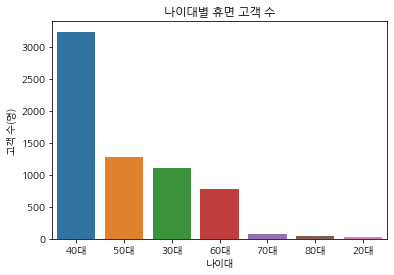

In [97]:
sns.barplot(x=df_hyumyun.index,y=df_hyumyun['total'])
plt.xlabel('나이대')
plt.ylabel('고객 수(명)')
plt.title('나이대별 휴면 고객 수')

In [34]:
sleep_spent = np.sum(df_sleep['purchase_amt'])/(len(df_act[df_act['ASD']=='S'])+len(df_act[df_act['ASD']=='D']))
sleep_spent

6922.945659377071

In [36]:
active_spent=np.sum(df_active['purchase_amt'])/len(df_act[df_act['ASD']=='A'])
active_spent

644344.1889030072

Text(0, 0.5, '객단가(원)')

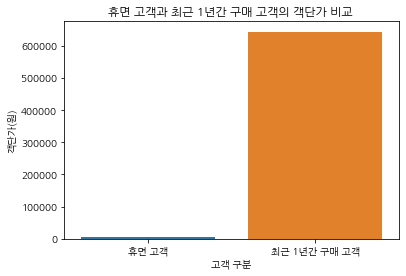

In [100]:
sns.barplot(x=['휴면 고객','최근 1년간 구매 고객'],y=[sleep_spent,active_spent])
plt.title('휴면 고객과 최근 1년간 구매 고객의 객단가 비교 ')
plt.xlabel('고객 구분')
plt.ylabel('객단가(원)')